In [32]:
# Importing all the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import os

In [81]:
# Reading the dataset and displaying the data structure
Bikes_df = pd.read_csv("day.csv")
display(pd.read_csv("day.csv"))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [35]:
# Display first ten rows
display(Bikes_df.head(10)) 

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [36]:
#Renaming columns
Bikes_df.rename(columns={
    'instant':'rec_id',
    "dteday":"datetime",
    "yr":"year",
    "mnth":"month",
    "weathersit":"weather_condition",
    "hum":"humidity",
    "cnt":"total_count"
},inplace=True)

In [37]:
display(Bikes_df.head())

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [40]:
# Describing the Dataset
display(Bikes_df.describe())

,rec_id,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [42]:
#Identifying missing values
display(Bikes_df.isnull().sum())

rec_id               0
datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

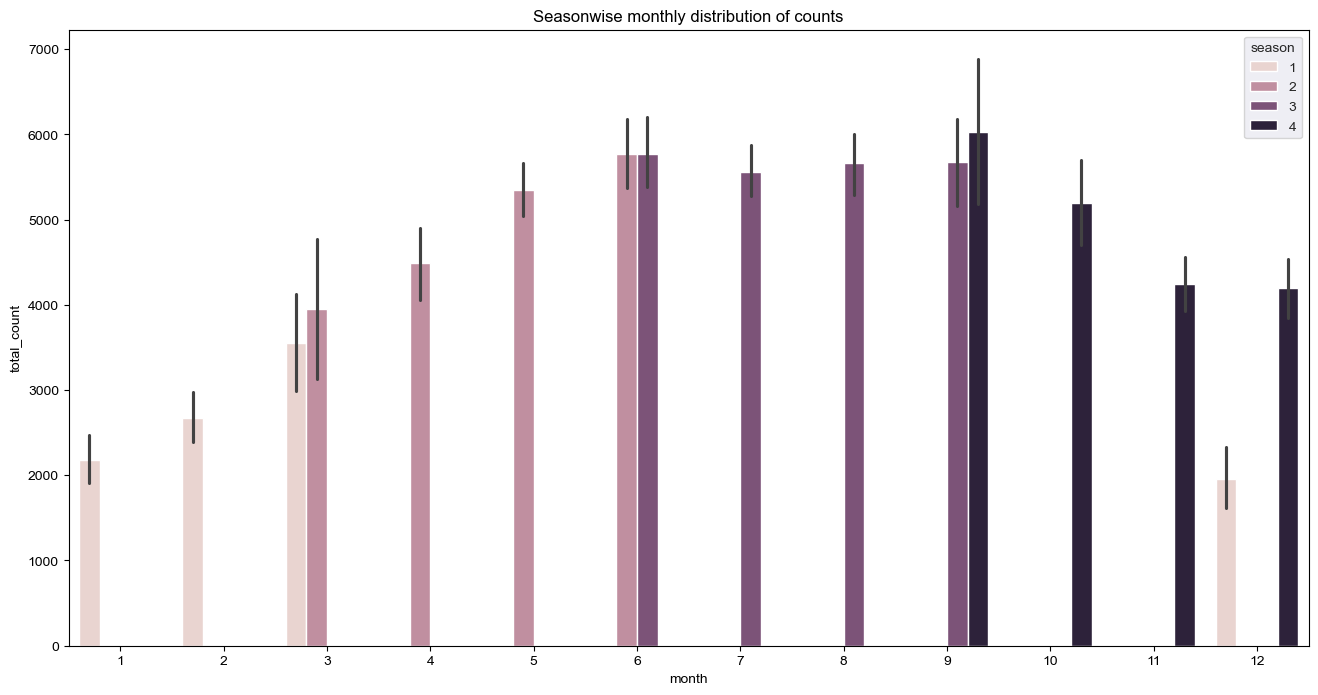

In [46]:
fig,ax = plt.subplots(figsize=(16,8))
sns.set_style('dark') # style must be one of white, dark, whitegrid, darkgrid, ticks

# Barplot for seasonwise monthly distribution of counts

sns.barplot(x='month',y = 'total_count',data=Bikes_df[['month','total_count','season']],ax=ax, hue='season')
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()

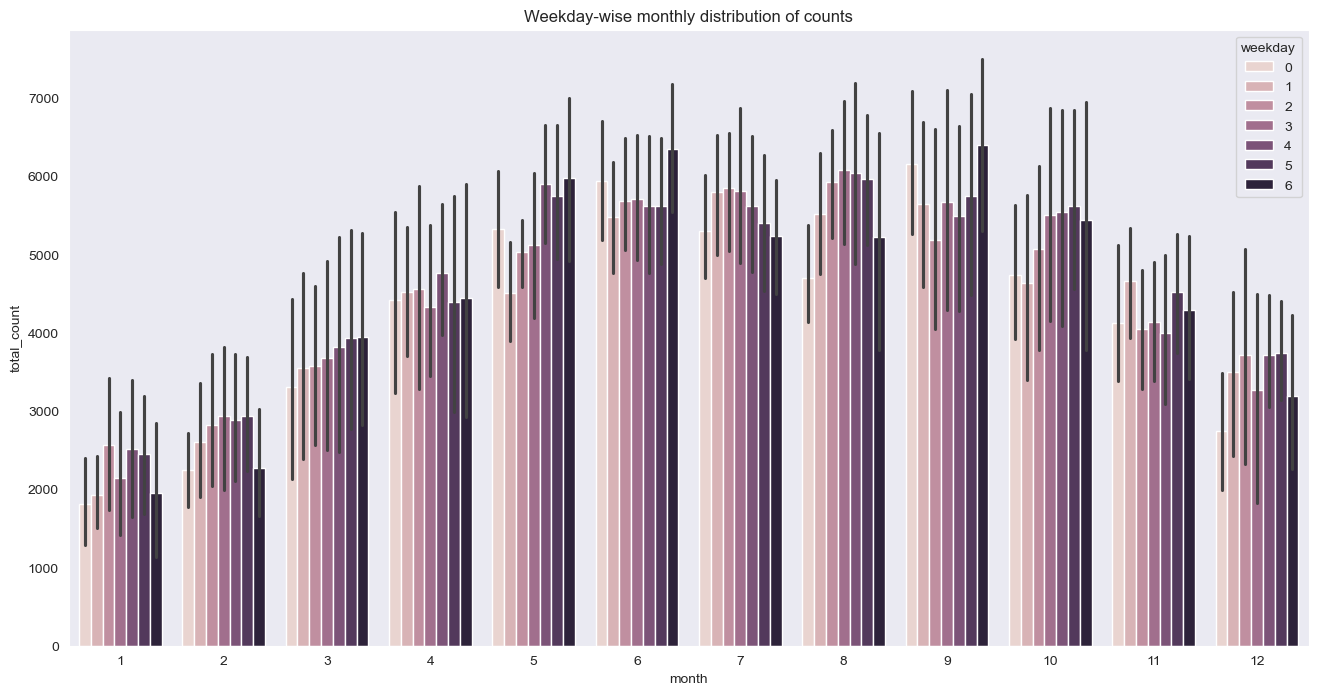

In [47]:
# Barplot for weekday-wise monthly distribution of counts

fig,ax1 = plt.subplots(figsize=(16,8))
sns.set_style('dark') 
# Barplot for seasonwise monthly distribution of counts

sns.barplot(data=Bikes_df[['month','total_count','weekday']], x='month',y = 'total_count',ax=ax1, hue='weekday')
ax1.set_title('Weekday-wise monthly distribution of counts')
plt.show()

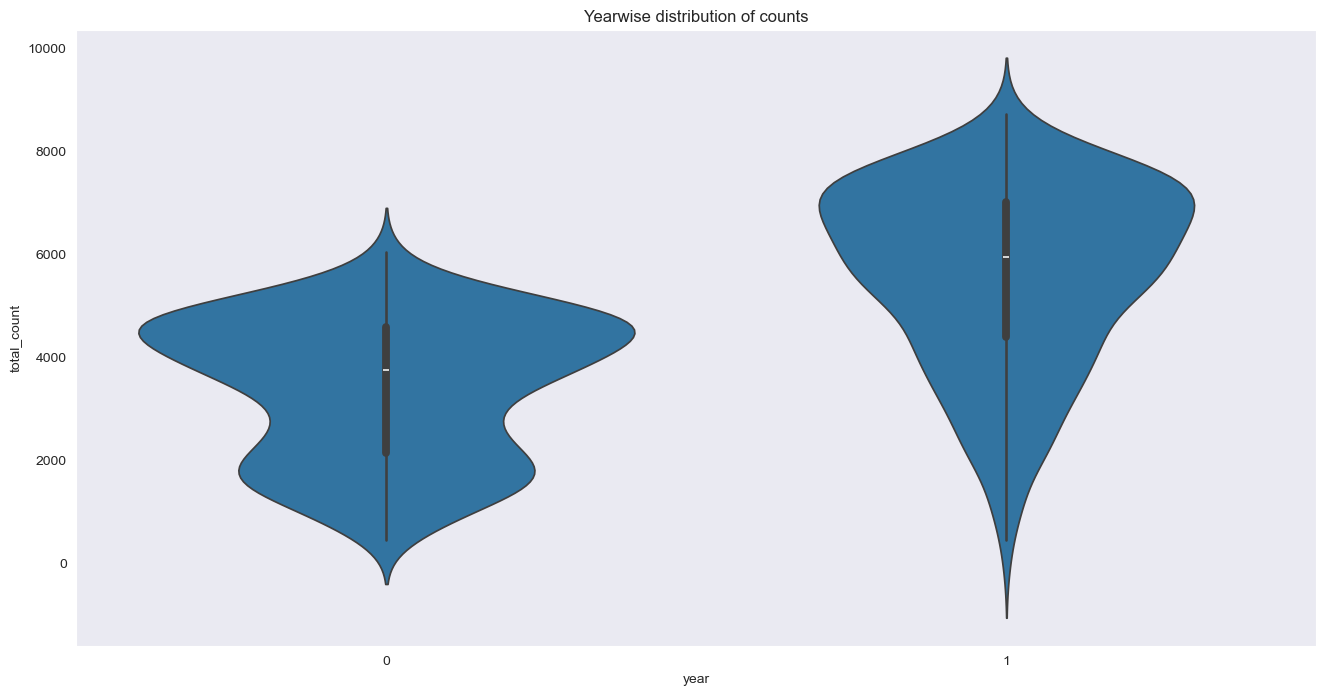

In [49]:
fig,ax = plt.subplots(figsize=(16,8))

# Violin for yearwise distribution of counts

sns.violinplot(data=Bikes_df[['year','total_count']], x='year',y = 'total_count')
ax.set_title('Yearwise distribution of counts')
plt.show()

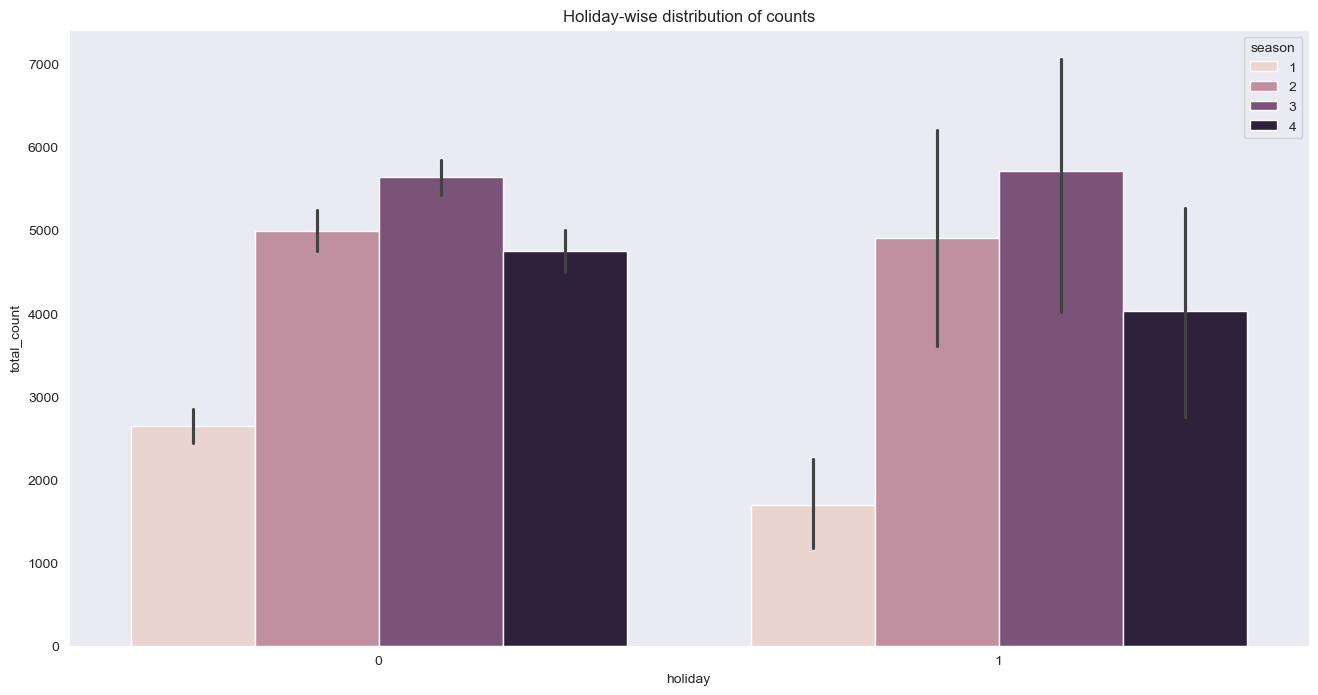

In [50]:
fig,ax = plt.subplots(figsize=(16,8))

# Barplot for holiday distribution of counts
sns.set_style('dark') 
sns.barplot(hue='season', data = Bikes_df, x='holiday',y = 'total_count')
ax.set_title('Holiday-wise distribution of counts')
plt.show()

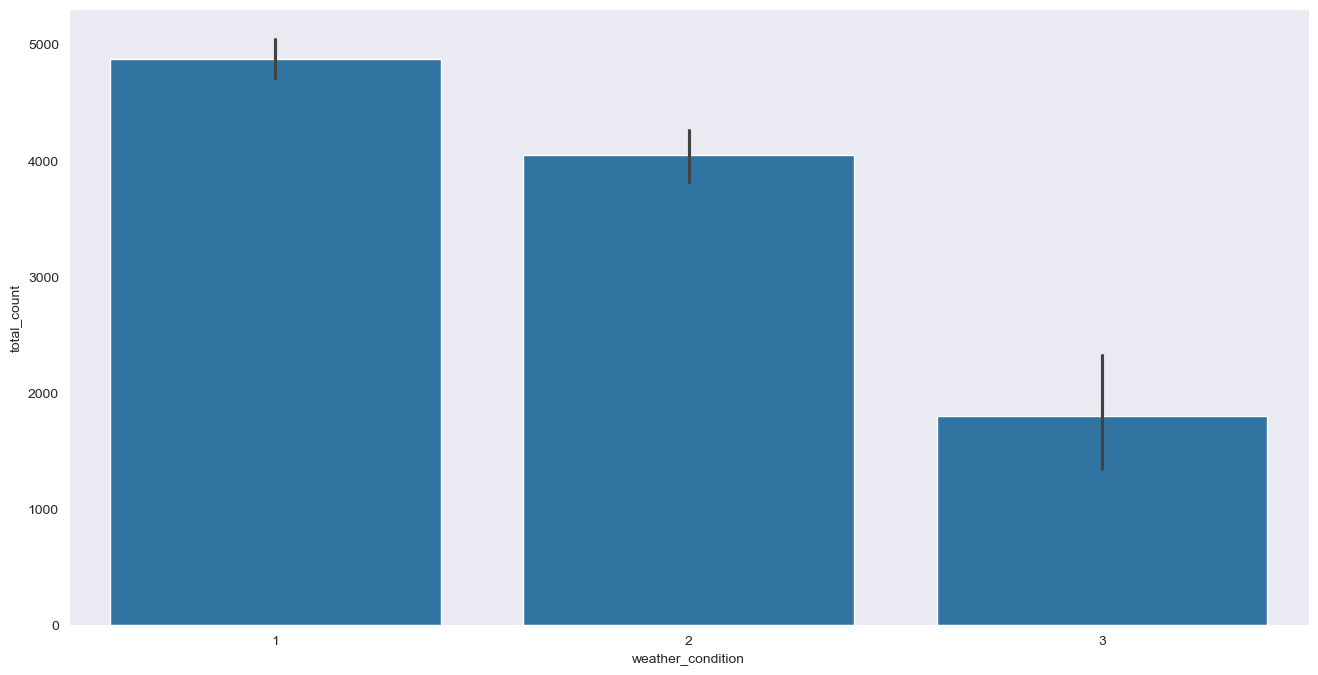

In [51]:
fig,ax1 = plt.subplots(figsize=(16,8))

# Barplot for Weather_condition_wise distribution of counts
ax.set_title('Weather_condition_wise distribution of counts')
sns.barplot(ax=ax1, data = Bikes_df[['month','total_count','weather_condition']], x='weather_condition',y = 'total_count')

plt.show()

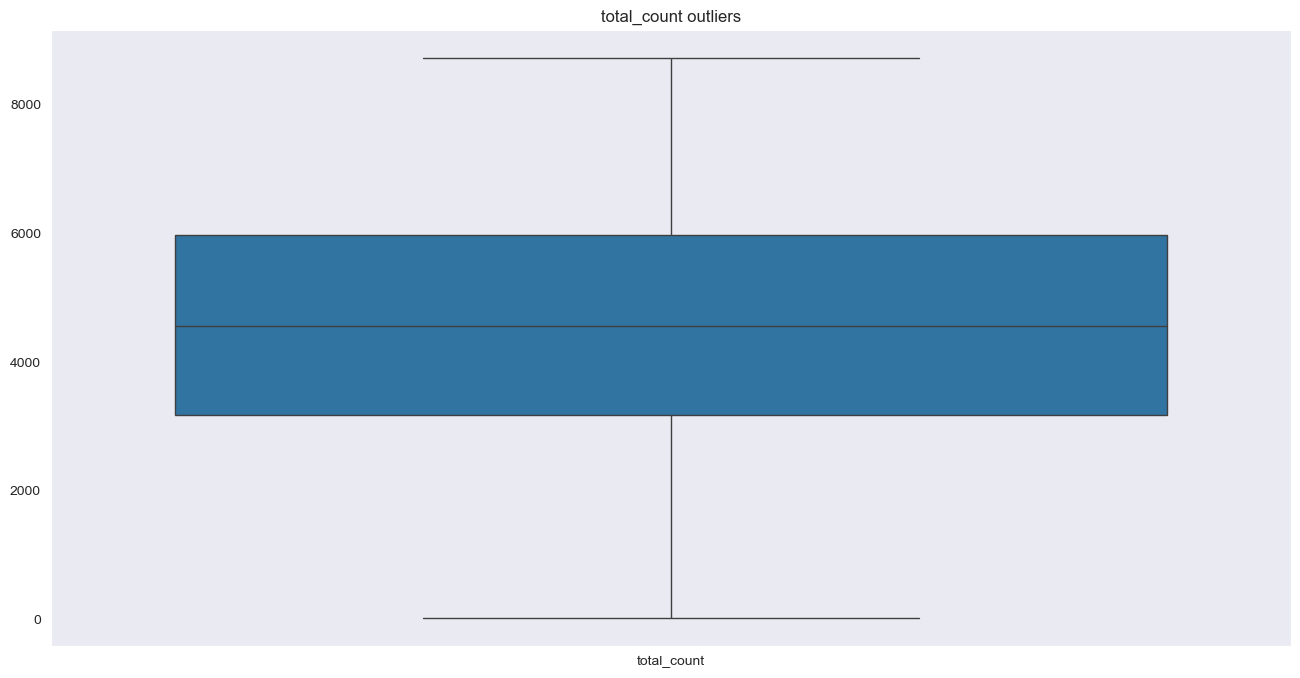

In [52]:
fig,ax=plt.subplots(figsize=(16,8))
#Boxplot for total_count outliers
ax.set_title('total_count outliers')
sns.boxplot(data=Bikes_df[['total_count']])

plt.show()

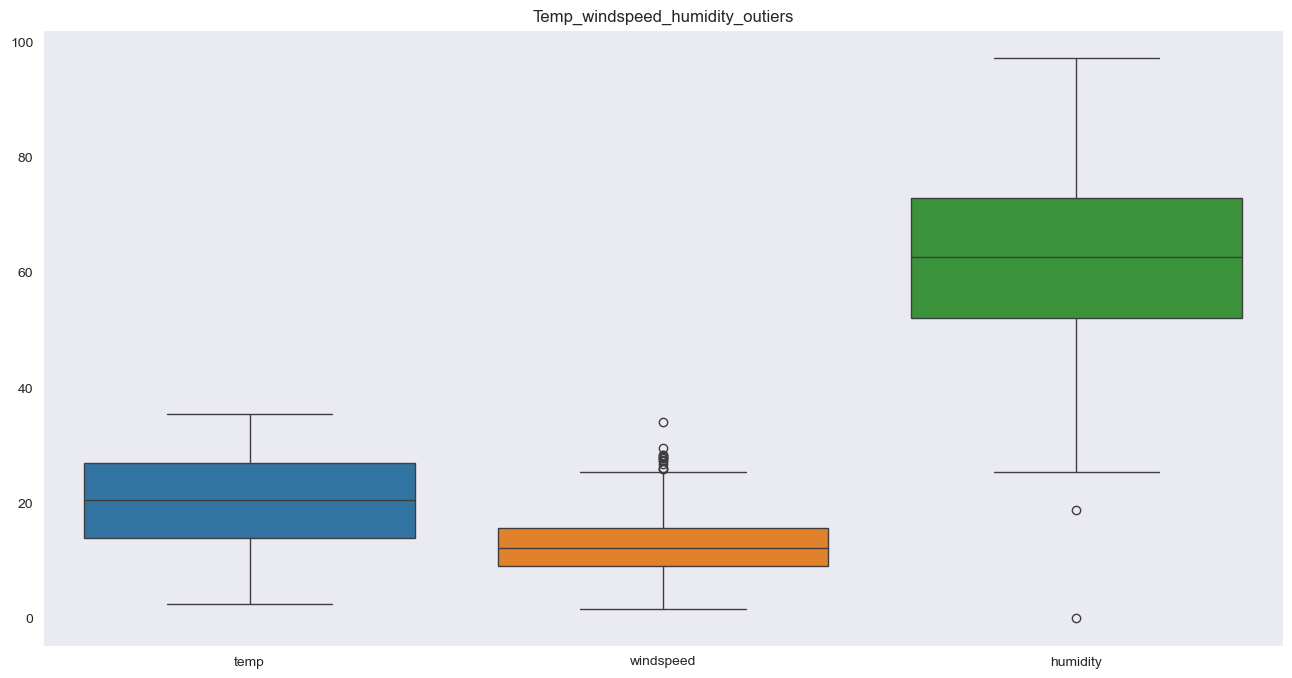

In [54]:
fig,ax=plt.subplots(figsize=(16,8))
#Box plot for Temp_windspeed_humidity_outliers
ax.set_title('Temp_windspeed_humidity_outiers')
sns.boxplot(data=Bikes_df[['temp','windspeed','humidity']])

plt.show()

In [55]:
#create dataframe for outliers
wind_hum=pd.DataFrame(Bikes_df,columns=['windspeed','humidity'])
 #Cnames for outliers                     
cnames=['windspeed','humidity']       
                      
for i in cnames:
    q75,q25=np.percentile(wind_hum.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr=q75-q25 #Inter quantile range
    max=q75+(iqr*1.5) #outer fence
    min=q25-(iqr*1.5) #inner fence
    wind_hum.loc[wind_hum.loc[:,i]<min,:i]=np.nan  #Replace with NA
    wind_hum.loc[wind_hum.loc[:,i]>max,:i]=np.nan  #Replace with NA
#Imputating the outliers by mean Imputation
wind_hum['humidity']=wind_hum['humidity'].fillna(wind_hum['humidity'].mean())
wind_hum['windspeed']=wind_hum['windspeed'].fillna(wind_hum['windspeed'].mean())

In [56]:
#Replacing the imputated humidity
Bikes_df['humidity']=Bikes_df['humidity'].replace(wind_hum['humidity'])
#Replacing the imputated windspeed
Bikes_df['windspeed']=Bikes_df['windspeed'].replace(wind_hum['windspeed'])
Bikes_df.head()

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


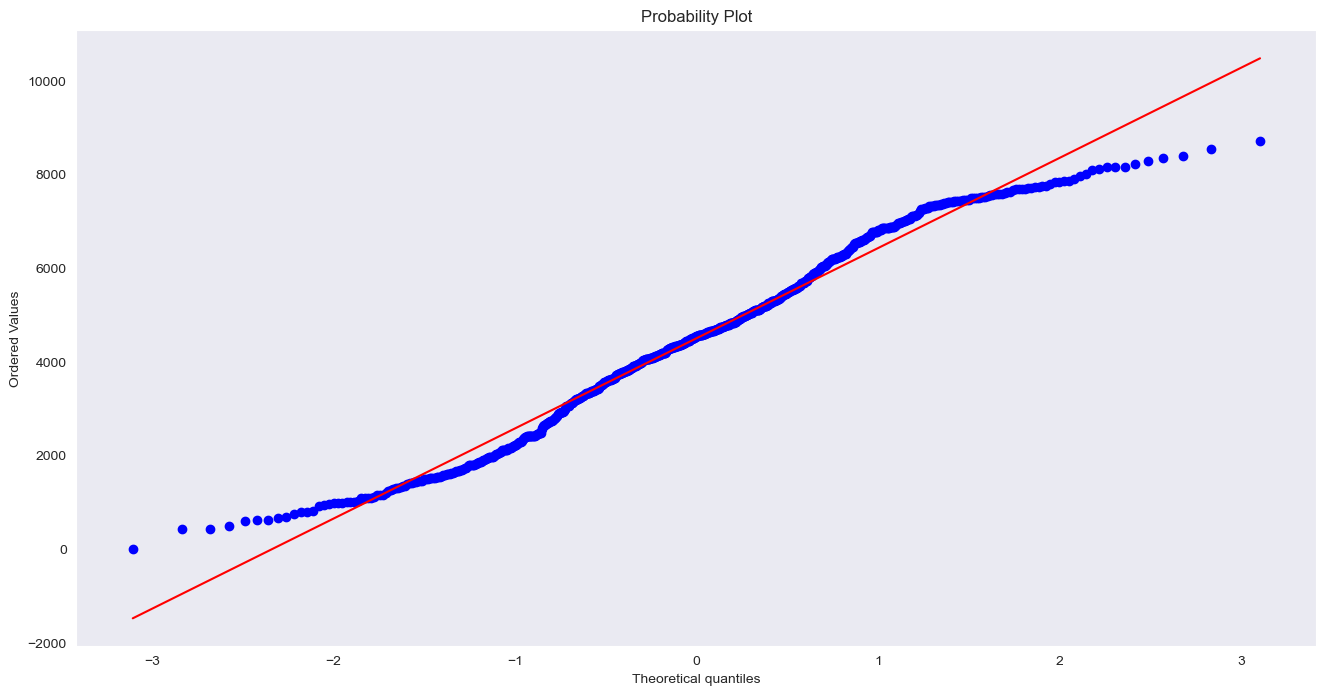

In [57]:
from scipy import stats
#Normal plot
fig=plt.figure(figsize=(16,8))
stats.probplot(Bikes_df.total_count.tolist(),dist='norm',plot=plt)
plt.show()

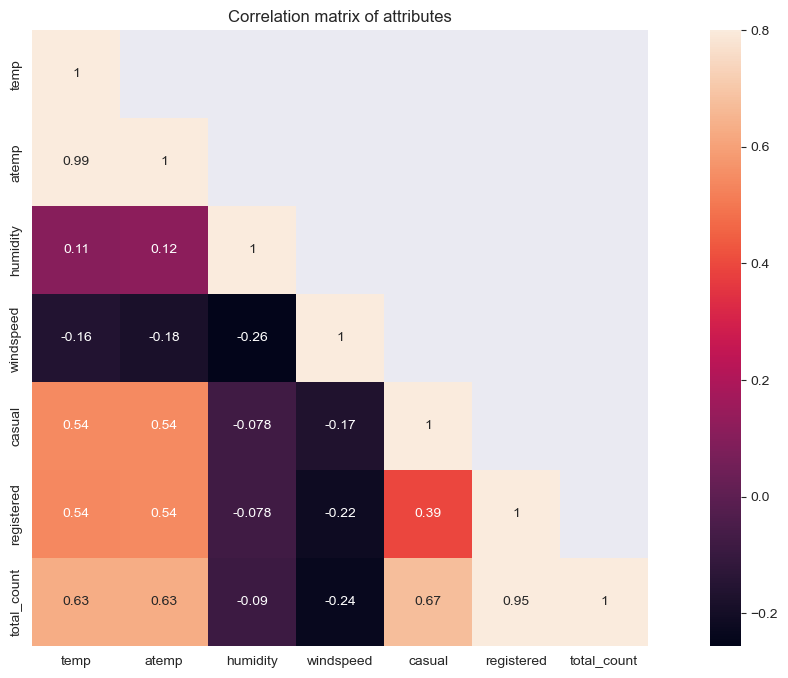

In [58]:
#Create the correlation matrix
correMtr=Bikes_df[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(16,8))
ax.set_title('Correlation matrix of attributes')
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)

plt.show()

In [60]:
#load the required libraries
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

In [82]:
#Split the dataset into the train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Bikes_df.iloc[:,0:-3],Bikes_df.iloc[:,-1],test_size=0.2, random_state=42)

#Reset train index values
X_train.reset_index(inplace=True)
y_train=y_train.reset_index()

# Reset train index values
X_test.reset_index(inplace=True)
y_test=y_test.reset_index()

display(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
display(y_train.head())
display(y_test.head())

(584, 14)

(146, 14)

(584, 2)

(146, 2)

,index,cnt
0,247,3351
1,335,3940
2,702,6606
3,440,7836
4,136,4123


,index,cnt
0,468,7460
1,148,4788
2,302,3331
3,355,3068
4,515,7338


In [64]:
#Create a new dataset for train attributes
train_attributes=X_train[['season','month','year','weekday','holiday','workingday','weather_condition','humidity','temp','windspeed']]
#Create a new dataset for test attributes
test_attributes=X_test[['season','month','year','weekday','holiday','workingday','humidity','temp','windspeed','weather_condition']]
#categorical attributes
cat_attributes=['season','holiday','workingday','weather_condition','year']
#numerical attributes
num_attributes=['temp','windspeed','humidity','month','weekday']

In [65]:
#To get dummy variables to encode the categorical features to numeric. 
# A dummy variable is a binary variable that takes a value of 0 or 1. 
# One adds such variables to a regression model to represent factors which are of a binary nature 
# i.e. they are either observed or not observed.

train_encoded_attributes=pd.get_dummies(train_attributes,columns=cat_attributes)
print('Shape of transfomed dataframe::',train_encoded_attributes.shape)
train_encoded_attributes.head(5)

Shape of transfomed dataframe:: (584, 18)


,month,weekday,humidity,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,9,1,79.0417,27.606653,14.250632,False,False,True,False,False,True,True,False,False,True,False,True,False
1,12,5,62.5833,12.880847,6.750518,False,False,False,True,True,False,False,True,True,False,False,True,False
2,12,2,73.3750,19.509153,11.666643,False,False,False,True,True,False,False,True,True,False,False,False,True
3,3,6,75.5833,21.080847,7.417168,True,False,False,False,True,False,True,False,False,True,False,False,True
4,5,2,83.7917,23.028347,18.582718,False,True,False,False,True,False,False,True,False,True,False,True,False


In [66]:
#Training dataset for modelling
X_train=train_encoded_attributes
y_train=y_train.total_count.values

In [67]:
#fit the trained model
lr_model=linear_model.LinearRegression()
lr_model
lr_model.fit(X_train,y_train)
lr_model

LinearRegression()

In [68]:
#Accuracy of the model
lr=lr_model.score(X_train,y_train)
print('Accuracy of the model :',lr)
print('Model coefficients :',lr_model.coef_)
print('Model intercept value :',lr_model.intercept_)

Accuracy of the model : 0.8197088728173161
Model coefficients : [  -30.72862833    69.08887656    -6.94951652   123.13728734
   -40.92897684 -1002.71774749   232.52357026   -13.58007717
   783.7742544    244.95146056  -244.95146056   -69.91289305
    69.91289305   897.58228209   397.3444028  -1294.92668489
 -1001.59581534  1001.59581534]
Model intercept value : 2006.4991753952277


In [69]:
#Cross validation prediction
predict=cross_val_predict(lr_model,X_train,y_train,cv=3)
predict

array([ 2802.35751555,  3811.24385221,  6184.427755  ,  4618.24891298,
        3418.18223183,  3635.48083118,  1107.64888865,  3715.14620886,
        2163.43179832,  5369.49593599,  6793.67796063,  5131.49295875,
        6454.7223443 ,  3543.65134866,  6643.40708952,  5049.96579908,
        1714.66046701,  3508.38097854,  4619.60561262,  2065.09901621,
        7755.08086026,  6861.19733724,  3250.90847969,  6956.79991475,
        1015.22084199,  4117.11416205,  4806.12826909,  7079.31346518,
        4659.53768688,  4000.61582089,  3857.66731548,  2285.63501278,
          78.9726599 ,  3331.68528346,  6543.02866897,  7060.52857749,
        4463.64315578,  6307.99179721,  5202.22842147,  5696.52335736,
        5096.23294642,  1195.27675669,  6919.85395594,  3786.32831933,
        2338.68060987,  5491.36937106,  3069.86602937,  1591.78226038,
        6257.02438288,  4273.55623868,  1397.36994282,  5099.99534186,
        5232.61137927,  4186.54948226,  6379.3140871 ,  5435.09824316,
      

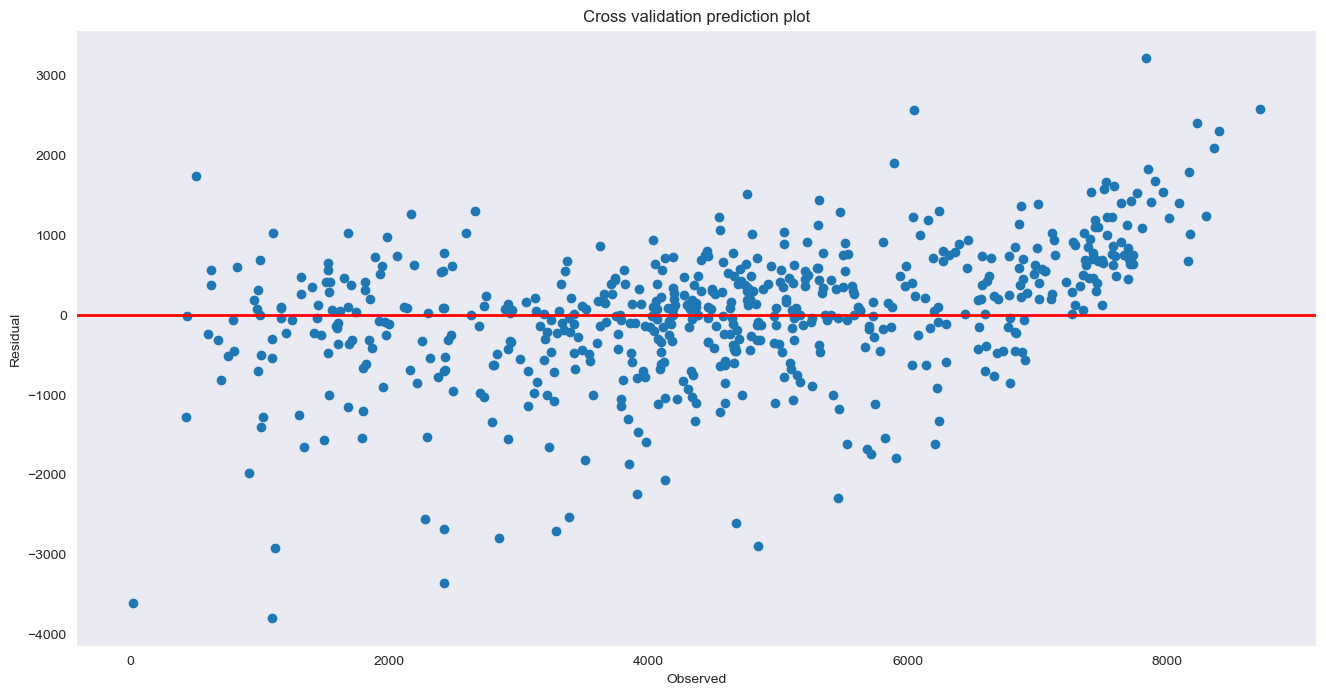

In [70]:
#Cross validation plot
fig,ax=plt.subplots(figsize=(16,8))
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='red')

plt.show()

In [71]:
#R-squared scores
r2_scores = cross_val_score(lr_model, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.8084906433759604


In [72]:
#To get dummy variables to encode the categorical features to numeric
test_encoded_attributes=pd.get_dummies(test_attributes,columns=cat_attributes)
print('Shape of transformed dataframe :',test_encoded_attributes.shape)
test_encoded_attributes.head()

Shape of transformed dataframe : (146, 18)


,month,weekday,humidity,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,4,6,50.2917,20.295000,12.791439,False,True,False,False,True,False,True,False,True,False,False,False,True
1,5,0,81.8750,27.367500,14.333846,False,True,False,False,True,False,True,False,True,False,False,True,False
2,10,0,62.3750,13.085847,11.833339,False,False,False,True,True,False,True,False,True,False,False,True,False
3,12,4,75.7500,17.356653,3.167425,True,False,False,False,True,False,False,True,False,True,False,True,False
4,5,4,49.2917,27.880000,13.083693,False,True,False,False,True,False,False,True,True,False,False,False,True


In [73]:
#Test dataset for prediction
X_test=test_encoded_attributes
y_test=y_test.total_count.values

In [74]:
#predict the model
lr_pred=lr_model.predict(X_test)
display(lr_pred)

array([6230.88589252, 4370.70303323, 3247.56533184, 2103.19216181,
       7130.78948097, 4747.53093151, 2112.58990525, 2590.51621948,
       3689.03410947, 3735.7334909 , 2987.77880422, 5023.64015087,
       1762.43516568, 3989.24236167, 5192.49559078, 2969.46055372,
       5737.23387831, 1307.47604002, 6156.22039522, 4271.24281892,
       3478.4759709 , 4068.44264992, 4524.52661898, 5775.69380818,
       5237.80554078, 5197.98344371, 3735.55921294,  678.98067875,
       4999.07973191, 1953.98680427, 3439.57492435, 3164.58467243,
       1250.35627333, 1193.75905979, 5528.30532784, 5198.56279691,
       3329.48021756, 3234.36497392,  863.6159545 , 6739.90062398,
       1847.19350015, 5777.73863797, 5013.60801659, 6231.87504792,
       4752.23298823, 3444.90907917, 6327.06114427, 5037.38425185,
       4450.08688644, 6761.26081374, 3870.24878197, 4447.92667324,
       5843.37979837, 5490.37732242, 5441.38779508, 6927.28684287,
       3699.83392883, 6274.1036338 , 4251.52617519, 5303.92922

In [75]:
import math
#Root mean square error 
rmse=math.sqrt(metrics.mean_squared_error(y_test,lr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,lr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 717.6303209814927
Mean absolute error : 554.292840556423


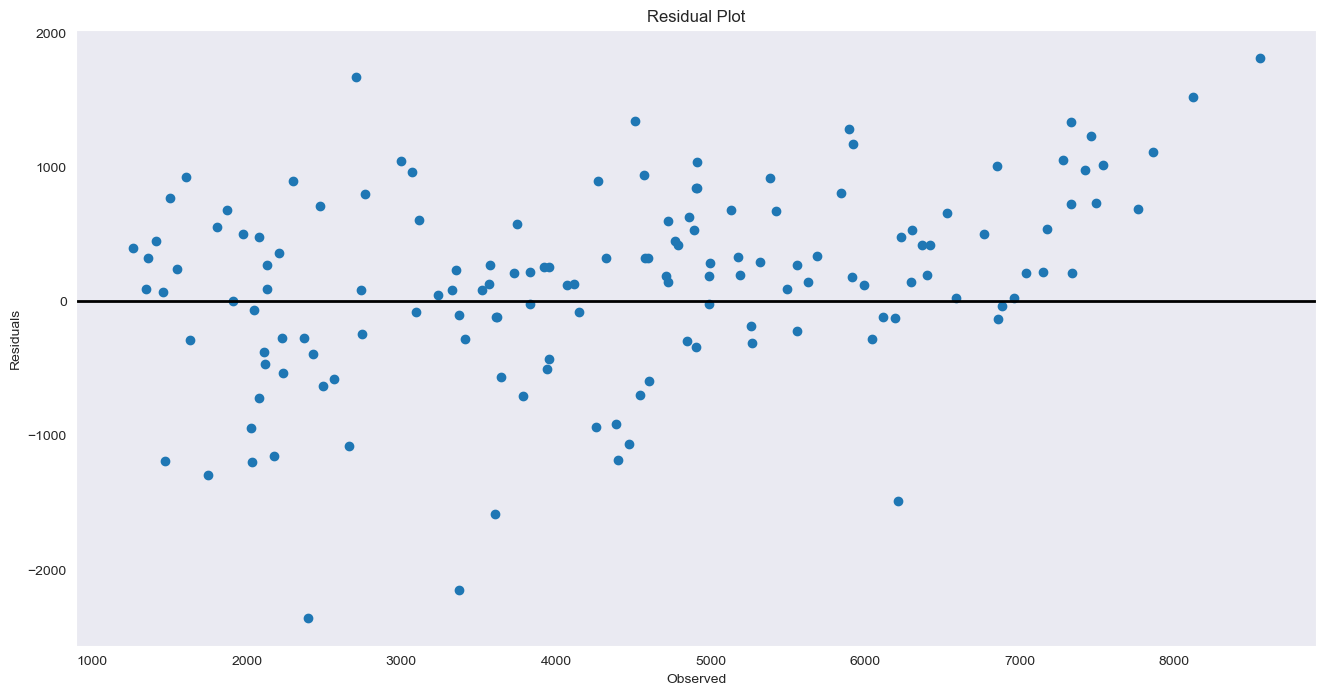

In [76]:
#Residual plot
fig, ax = plt.subplots(figsize=(16,8))
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
ax.scatter(y_test, y_test-lr_pred)
ax.axhline(lw=2,color='black')

plt.show()

In [ ]:
In this residual plot,very less data points are having the same finite variance between them.

In [84]:
import numpy as np
print(np.version)

<module 'numpy.version' from 'C:\\Users\\Farhana\\anaconda3\\Anaconda\\Lib\\site-packages\\numpy\\version.py'>
